# Logistic Regression

<h2>Table of Contents</h2>
<ol>
    <li>
        <p>
            <a href="#1-lr">Logistic Regression</a>
            <ol>
                <li><a href="#1-1">Data Visualization</a></li>
                <li><a href="#1-2">Implementation</a></li>
            </ol>
        </p>
    </li>
    
</ol>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Logistic Regression <a id='1-lr'></a>
<br/>
<div lang="fa-IR" dir="rtl" style="font-family:Times; font-size:1em;">
    <div dir="rtl">
    در این بخش از تمرین شما یک مدل Logistic Regression خواهید ساخت تا پیشبینی کند که آیا یک دانش‌آموز در یک دانشگاه پذیرفته خواهد شد یا نه.
    </div>
    <br/>
    <div dir="rtl">
        فرض کنید که شما رئیس یک دانشکده هستید و می خواهید احتمال پذیرش هر داوطلب را بر اساس نمرات آن‌ها در 2 آزمون مشخص کنید.
    </div>
    <br/>
    <div dir="rtl">
        به شما یک مجموعه داده‌های تاریخی داده شده است که در واقع همان training set شماست. با استفاده از این داده‌های تاریخی می‌خواهید یک مدل Logistic Regression بسازید که بتوانید احتمال پذیرش دانش‌آموزان را پیشبینی کنید.
    </div>
</div>

### Data Visualization <a id="1-1"></a>
<br/>

<div lang="fa-IR" dir="rtl" style="font-family:Times; font-size:1em;">
    <div dir="rtl">
        قبل از شروع فرآیند مدل‌سازی همواره باید داده‌ها را بررسی کنیم و ویژگی‌های آن را بشناسیم. این کار در اصطلاحاً <b>تحلیل داده‌ی اکتشافی</b> می‌گویند. در تحلیل داده‌ی اکتشافی مصورسازی داده‌ها یکی از بهترین و مرسوم‌ترین ابزارها برای بررسی داده و کشف الگوهاست.
    (تحلیل داده‌ی اکتشافی ترجمه‌ی Exploratory Data Analysis (EDA) است)</div>
    <br/>
    <div dir="rtl">
        در این بخش داده‌ها را خوانده و ترسیم می‌کنیم. در داده‌ها ستون اول نمره‌ی داوطلب در آزمون اول، ستون دوم نمره‌ی داوطلب در آزمون دوم و ستون سوم نشان‌دهنده‌ی پذیرفته شدن یا نشدن داوطلب در دانشگاه است.
        به اول این داده‌ها یک ستون جدید اضافه می‌کنیم که مقدار آن برای تمام سطرها یکسان و برابر با 1 است.
    </div>
    <br/>
</div>

In [2]:
# Run the followig code to upload data #
data = np.loadtxt("./ex2data1.txt", delimiter=',')

# This command shows the shape of the data
data.shape

# add a column of 1 as the first columns of dat
ones = np.ones(shape=(data.shape[0], data.shape[1]+1))
ones[:,1:] = data
data = ones
print(f"shape of data = {data.shape}")

# separte features from labels for training data
x_train = data[:,:3]
y_train = data[:,:4]

shape of data = (100, 4)


In [3]:
# Let's see the first 5 records in data
data[:5]

array([[ 1.        , 34.62365962, 78.02469282,  0.        ],
       [ 1.        , 30.28671077, 43.89499752,  0.        ],
       [ 1.        , 35.84740877, 72.90219803,  0.        ],
       [ 1.        , 60.18259939, 86.3085521 ,  1.        ],
       [ 1.        , 79.03273605, 75.34437644,  1.        ]])

<Figure size 648x432 with 0 Axes>

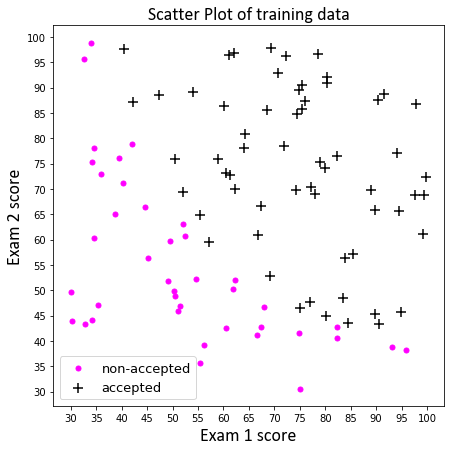

In [4]:
# Plot
plt.figure(figsize=(9,6))

########################
#  Start of your code  #

# Use matplotlib scatter plot function to plot profit versus population

# extract x axis values from data
x = data[:,1]
# extract y axis values from data
y = data[:,2]
# extract labels from data: (0, 1) depending on whether a student is accepted or non-accepted
group = data[:,3]

cdict = {0: 'magenta', 1: 'black'}
labels = {0: 'non-accepted', 1:'accepted'}
markers = {0: '.', 1: '+'}

fig, ax = plt.subplots(figsize=(7,7))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(x[ix], y[ix], c = cdict[g], label = labels[g], marker=markers[g], s = 100)
ax.legend(fontsize=13)

#   end  of your code  #
########################

plt.xticks(np.arange(30,101,step=5))
plt.yticks(np.arange(30,101,step=5))
plt.xlabel("Exam 1 score" , fontsize=18, fontfamily="Calibri" )
plt.ylabel("Exam 2 score", fontsize=18, fontfamily="Calibri" )
plt.title("Scatter Plot of training data", fontsize=18, fontfamily="Calibri" )
plt.show()

###### Expected plot
<img width=400 src="./data1.png">

### Implementation <a id="1-2"></a>
#### Sigmoid function

<br/>

<div lang="fa-IR" dir="rtl" style="font-family:Times; font-size:1em;">
    <div dir="rtl">
        همانطور که در کلاس صحبت کردیم در یک مدل Logistic Regression فرضیه‌ی ما به شکل زیر است:
    </div>
    <br/>
</div>
$$
h_\theta(x) = g~(\theta^Tx)
$$
<div lang="fa-IR" dir="rtl" style="font-family:Times; font-size:1em;">
    <div dir="rtl">
        که در آن g تابع sigmoid است و به شکل زیر تعریف می‌شود:
    </div>
    <br/>
</div>
$$
g~(z) = \frac{1}{1+e^{-z}}
$$
<div lang="fa-IR" dir="rtl" style="font-family:Times; font-size:1em;">
    <div dir="rtl">
        در این قسمت شما تابع sigmoid را باید پیاده‌سازی کنید
    </div>
    <br/>
</div>

In [5]:
# define sigmoid function
def sigmoid(z):
    """
    sigmoid function
    
    Args:
        z (np.array): z is numpy array of floats or ints
    
    Returns:
        g_of_z (np.array): the function returns g_of_z which is an array with the same shape as z 
                            and the value in each element of the g_of_z is equalt to applying the 
                            sigmoid function to corresponding element in z
    """
    assert(isinstance(z, np.ndarray))
    #######################
    # start your code here
    g_of_z = 1/(1+np.exp(-z))
    # end your code here
    ######################
    return g_of_z

In [6]:
# rund the follwing code to see if your implementation is currect
sigmoid(np.array([-10, -1, -0.5, 0, 0.5, 1, 10]))

array([4.53978687e-05, 2.68941421e-01, 3.77540669e-01, 5.00000000e-01,
       6.22459331e-01, 7.31058579e-01, 9.99954602e-01])

###### Expected output
array([4.53978687e-05, 2.68941421e-01, 3.77540669e-01, 5.00000000e-01,
       6.22459331e-01, 7.31058579e-01, 9.99954602e-01])

#### Cost function and gradient

<div lang="fa-IR" dir="rtl" style="font-family:Times; font-size:1em;">
    در این مرحله تابع هزینه cost function و گرادیان gradeint پیاده سازی خواهند شد. تابع هزینه از فرمول زیر به دست می‌آید:
</div>
$$
 J(\theta) = \frac{1}{m} \sum_{i=1}^m [-y^{(i)}~\log(h_\theta(x^{(i)})) ~-~ (1-y^{(i)})~\log(1-h_\theta(x^{(i)}))]
$$
<div lang="fa-IR" dir="rtl" style="font-family:Times; font-size:1em;">
  همچین برای محاسبه‌ی گرادیان‌ها از رابطه‌ی زیر استفاده می‌شود:
</div>
$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta (x^{(i)}) - y^{(i)}) x_j^{(i)}
$$
<div lang="fa-IR" dir="rtl" style="font-family:Times; font-size:1em;">
  در محاسباتی شبیه تمام بالا، بررسی ابعاد ماتریس‌ها هنگام ضرب بسیار مهم است و اصلی ترین منبع خطا در این محاسبات عدم تطابق بعدهای ماتریس‌هاست. توصیه می‌شود قبل از نوشتن کد، بر روی کاغذ ابعاد ماتریس‌ها را بررسی کنید و نحوه‌ی ضرب آن‌ها را مشخص کنید.
</div>

In [7]:
data[:, :3].shape[0]

100

In [9]:
def cost(theta, x, y):
    
    # number of training samples
    m = x.shape[0]
    # initialize a varaible to store cost value
    J = 0
    # initialize a numpy array to store gradient of theta
    grads = np.zeros(shape=theta.shape)
    
    # compute cost function
    h_array = sigmoid(np.matmul(theta.T, x.T)) # shape: 1xm
    assert(h_array.shape == (1,m))
    J = (1.0/m)*(- np.matmul(y.T, np.log(h_array).T) - np.matmul((1-y).T, np.log(1-h_array).T ))[0][0]

    grads = (1.0/m)*np.matmul(h_array - y.T, x).T
    
    return J, grads

In [10]:
theta = np.zeros((3,1))
J, grads = cost(theta, data[:,:3], data[:,3:4])
print(f"cost = {J}")
print(f"gradients  = {grads}")

cost = 0.6931471805599452
gradients  = [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


###### Expected output
cost = 0.6931471805599452            
gradients = [[ -0.1000]       
            [-12.0092]          
            [-11.2628 ]]

#### Train
<div lang="fa-IR" dir="rtl" style="font-family:Times; font-size:1em;">
   در این بخش تابعی نوشته می‎شود که هدف آن برازش پارامترهای مدل Logistic Regression با استفاده از داده‌های train است.
</div>

In [11]:
def train(theta, x, y, learning_rate=0.001, iteration=400):
    for i in range(iteration):
        J, grads = cost(theta, x, y)
        theta -= learning_rate*grads
        
        if i%20 == 0:
            print(f"Cost = {J}")
        
    return theta, J

In [12]:
np.random.seed(103)
theta = np.random.randn(3,1)
theta, J = train(theta, data[:,:3], data[:,3:4], learning_rate=0.001, iteration=101)
print(f"cost = {J}")
print(f"theta  = {theta}")

Cost = 3.6465647833222783
Cost = 2.384311444628078
Cost = 1.3182744154854964
Cost = 0.6583194425347584
Cost = 0.5533340231045477
Cost = 0.5490084241379319
cost = 0.5490084241379319
theta  = [[-1.25661688]
 [ 0.01795097]
 [ 0.0115167 ]]


#### Build Logistic Regression Model and Train the Model

#### find threshold
<br/>

<div lang="fa-IR" dir="rtl" style="font-family:Times; font-size:1em;">
   در این بخش هدف دسته بندی داده‌ها با استفاده از مدل Logistic Regression است. برای دسته‌بندی علاوه بر داشتن پارامترهای مدل نیاز است که یک threshold انتخاب شود. منظور از threshold عددی است که اگر مقدار پیشبینی از آن بزرگتر باشد برچسب قبولی به داوطلب زده می‌شود و اگر پایین تر باشد برچسب قبول نشدن.
</div>
<br/>
<div lang="fa-IR" dir="rtl" style="font-family:Times; font-size:1em;">
    برای یافتن بهترین پیشبینی باید threshold ای را پیدا کنیم که به ازای آن دقت مدل در پیشبینی قبولی داوطلب ها بیشینه باشد.
</div>

In [13]:
def predict(theta, x, thresh):
    predictions = sigmoid(np.matmul(theta.T, x.T))
    y_pred = (predictions >= thresh).T
    return y_pred

def evaluate(theta, x, y, thresh):
    y_pred = predict(theta, x, thresh)
    return (y_pred == y).mean()

def find_best_threshold(theta, x, y):
    accuracy = 0
    thresh = 0.5
    for thresh_candidate in np.linspace(0.01,1,1000):
        new_accuracy = evaluate(theta, x, y, thresh_candidate)
        if new_accuracy > accuracy:
            thresh = thresh_candidate
            accuracy = new_accuracy
        
        
    return thresh, theta

In [32]:
# seed for random number generation
np.random.seed(103)
# training features and labels
x = data[:,:3] # features
y = data[:,3:4] # labels
# get number of samples
m = x.shape[0]
# get dimension of features (plus bias)
dim = x.shape[1]
# initialize theta with random normal 
theta = np.random.randn(dim, 1)
# train the model (fit theta prameters)
theta, J = train(theta, x, y, learning_rate=0.001, iteration=101)
# find best threshold
thresh, theta = find_best_threshold(theta, x, y)
# the model
print("  ================== Logistic Regression Model ======================")
print(f"Model = {theta[0,0]} + {theta[1,0]}*X_1 + {theta[2,0]}*X_2 ")
print(f"threshold = {thresh}")
print(f"if sigmoid( {theta[0,0]} + {theta[1,0]}*X_1 + {theta[2,0]}*X_2 ) >= {thresh}    =====> accept")
print(f"if sigmoid( {theta[0,0]} + {theta[1,0]}*X_1 + {theta[2,0]}*X_2 ) < {thresh}    =====> non-accept")

Cost = 3.6465647833222783
Cost = 2.384311444628078
Cost = 1.3182744154854964
Cost = 0.6583194425347584
Cost = 0.5533340231045477
Cost = 0.5490084241379319
  ================== Logistic Regression Model ======================
Model = -1.2566168773662427 + 0.01795097358556288*X_1 + 0.011516697297689516*X_2 
threshold = 0.6105405405405406
if sigmoid( -1.2566168773662427 + 0.01795097358556288*X_1 + 0.011516697297689516*X_2 ) >= 0.6105405405405406    =====> accept
if sigmoid( -1.2566168773662427 + 0.01795097358556288*X_1 + 0.011516697297689516*X_2 ) < 0.6105405405405406    =====> non-accept


In [36]:
sigmoid(np.array([0.45]))

array([0.61063923])

Text(0.5, 1.0, 'Scatter Plot of training data')

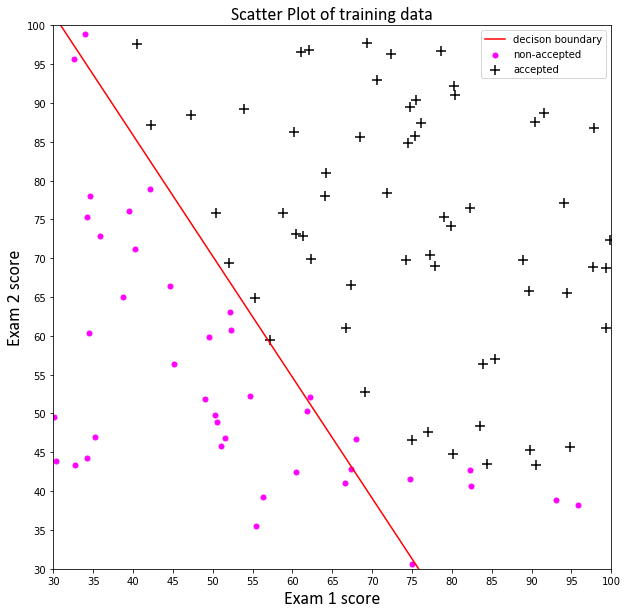

In [37]:
# extract labels from data: (0, 1) depending on whether a student is accepted or non-accepted
group = data[:,3]

cdict = {0: 'magenta', 1: 'black'}
labels = {0: 'non-accepted', 1:'accepted'}
markers = {0: '.', 1: '+'}

fig, ax = plt.subplots(figsize=(10,10))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(x[:,1][ix], x[:,2][ix], c = cdict[g], label = labels[g], marker=markers[g], s = 100)
ax.legend(fontsize=20)


#### Plot decision boundary
x_values = np.linspace(0,100,101)
# because sigmoid(0.45) = 0.62 and threshold is 0.62 ==> sigmoid^-1(thresh) = 0.45
y_values = (1/(theta[2,0]))*(0.45 - theta[0,0]*1 - theta[1,0]*x_values)


plt.xticks(np.arange(30,101,step=5))
plt.yticks(np.arange(30,101,step=5))
plt.ylim((30,100))
plt.xlim((30,100))
plt.xlabel("Exam 1 score" , fontsize=18, fontfamily="Calibri" )
plt.ylabel("Exam 2 score" , fontsize=18, fontfamily="Calibri" )
plt.plot(x_values, y_values, label="decison boundary", c='red')
plt.legend()
plt.title("Scatter Plot of training data", fontsize=18, fontfamily="Calibri" )